<a href="https://colab.research.google.com/github/iris10130901/AI_Project/blob/main/%E9%81%8B%E7%94%A8Selenium%E6%8A%93%E5%8F%96Google_Map%E8%A9%95%E8%AB%96%E8%B3%87%E6%96%99%E9%80%B2%E8%A1%8CNLP%E5%88%86%E6%9E%90_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- ËíêÈõÜÂè∞‰∏≠Â∏ÇÂçÄ(Êù±ÂçÄ„ÄÅË•øÂçÄ„ÄÅÂçóÂçÄ„ÄÅÂåóÂçÄ„ÄÅ‰∏≠ÂçÄ„ÄÅË•øÂ±ØÂçÄ„ÄÅÂçóÂ±ØÂçÄ„ÄÅÂåóÂ±ØÂçÄ) ÂêÑÁæéÈ£üÈ§êÂª≥ 
- ÈÅ∏Âèñ3.0È°ÜÊòü‰ª•‰∏äÈ§êÂª≥



# ÊñáÂ≠óÊé¢Âãò

In [ ]:
import jieba
import csv
import operator
from collections import Counter
import pandas as pd

In [ ]:
jieba.set_dictionary('/content/drive/MyDrive/Colab Notebooks/dataNLP/dict.txt')

In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/dataNLP/stop.txt') as f:
    stops = f.read().split('\n')

In [ ]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/dataNLP')
!pwd 

/content/drive/MyDrive/Colab Notebooks/dataNLP


In [ ]:
import re
import requests
import jieba
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
df = pd.read_excel('Âè∞‰∏≠_all.xlsx')
df

Â∫óÂêç  \
0          È∫ªËæ£ È∫ªÈ¨•Âπ≤Èçã ÂñùÈÖíËÅöÊúÉ/Âè∞‰∏≠ÁæéÈ£ü/Ë•øÂçÄÊôöÈ§ê/Ë•øÂçÄÂÆµÂ§ú/Ë•øÂçÄÈ∫ªËæ£/ÊôöÈ§êÁæéÈ£ü/Âã§ÁæéÂÆµÂ§ú/   
1    Âç∑Âç∑Â∫µÊó•ÂºèÊñôÁêÜÔΩúÁÑ°ËèúÂñÆÊñôÁêÜÔΩúÁîüÈ≠öÁâáÔΩúÂè∞‰∏≠ÁæéÈ£üÔΩúÔΩúÂã§ÁæéÁæéÈ£üÔΩúÂØ©Ë®àÊñ∞ÊùëÔΩúÂè∞‰∏≠ÁáíÁÉ§Â∫óÔΩúÁèæÊ¶®ÁîüÂï§ÈÖíÔΩú...   
2                         ÂçØÊúàÂ±ÖÈÖíÂ±ãÔΩúË•øÂçÄÂ±ÖÈÖíÂ±ãÔΩúÂè∞‰∏≠Â±ÖÈÖíÂ±ãÊé®Ëñ¶ÔΩúË•øÂçÄÁæéÈ£üÔΩú‰∏≤ÁáíÔΩú   
3                                                Á®ª¬∑È∫•È£üÂ†Ç   
4                                    Offer OhÊò®Êó•Ëä±Âç∑ Ë∑®ÁïåÂ•ΩÈ£ü   
..                                                 ...   
145                   Á¶æÊó•Â∏∏¬∑Á¶æÂ§úÂ∏∏ÔºªÊù±ÂçÄÁæéÈ£üÔºΩ ÔºàÊó©ÂçàÈ§ê ÂíñÂï°Âª≥ È§êÈÖíÈ§® Á≤æÈáÄÈÖíÂêßÔºâ   
146                                              Âè∞‰∏≠È´òÈ∫óÂ±ã   
147                                               Âπ∏Á¶èÂ∞èÈ§®   
148                                         ÈáëË°õ‰∫≠ÊµÆË™áÂ£ΩÂè∏È¶ñ‰ª£ÁõÆ   
149                                         Ëä±ÂõçÂÆ∂Êó•ÂºèÊñôÁêÜË£ΩÁ†îÊâÄ   

                                                    Á∂≤ÂùÄ   ÊòüÁ¥ö    Ë©ïË´ñ  \
0    https://www.google.com.tw/maps/place/%E9%BA%BB...  4.5   239   
1    https://www.google.com.tw/maps/place/%E5%8D%B7...  4.1   360   
2    https://www.google.com.tw/maps/place/%E5%8D%AF...  4.7    97   
3    https://www.google.com.tw/maps/place/%E7%A8%BB...  4.5   417   
4    https://www.google.com.tw/maps/place/Offer+Oh%...  4.4  3178   
..                                                 ...  ...   ...   
145  https://www.google.com.tw/maps/place/%E7%A6%BE...  4.8   574   
146  https://www.google.com.tw/maps/place/%E5%8F%B0...  4.1  2447   
147  https://www.google.com.tw/maps/place/%E5%B9%B8...  4.3  1524   
148  https://www.google.com.tw/maps/place/%E9%87%91...  4.9  3097   
149  https://www.google.com.tw/maps/place/%E8%8A%B1...  4.6  1508   

                                                    ÂõûÂæ©                   Âú∞ÂùÄ  
0    ['ÈüìÂúãÈ∫µÂ•ΩÂêÉÔºåËá≠Ë±ÜËÖêÂæà‰πæÔºåÈ¥®ËÉóÁ°¨Âà∞Âí¨‰∏çÂãïÔºåÂÖ∂‰ªñÊñôÈÉΩÂæàÂ∞ëÔºå‰∏çÂêàÂÄã‰∫∫Âè£Âë≥„ÄÇ ', 'Êé®~ÊúçÂãôÂ•Ω...     403Âè∞‰∏≠Â∏ÇË•øÂçÄÂçöÈ§®‰∏âË°ó148Ëôü  
1    ['Êó•Âºè‰∫≠ÂúíÈÄ†ÊôØÔºåÂÑ™ÈõÖË£ùÊΩ¢ÔºåË≥ìËá≥Â¶ÇÊ≠∏ÁöÑÊúçÂãôÔºåÊàëÂÄëÈªû‰∫ÜÂ•óÈ§êÔºåÂªöÂ∏´ÁöÑÊâãËóùÂæàÊ£íÔºåÊÄßÂÉπÊØîÂæàÈ´ò ', ...       403Âè∞‰∏≠Â∏ÇË•øÂçÄ‰∏≠ËààË°ó82Ëôü  
2    ['Â•ΩÂêÉÂà∞Âì≠‚Ä¶ÁâõËÇâ‰∏≤„ÄÅÈõûËÇâ‰∏≤„ÄÅÁÇíÊ∞¥ËìÆÂíåÈÆ≠È≠öÁÇíÈ£ØÂøÖÈªûÔºÅüòç ', 'È§êÈªû‰∏≠Ë¶è‰∏≠Áü©ÔºåÂè£Âë≥ÈÇÑË°åÂ∞±ÊòØÂá∫...      403Âè∞‰∏≠Â∏ÇË•øÂçÄ‰∏≠ÁæéË°ó462Ëôü  
3    ['ÊùæÈò™Ë±¨„ÄÅÁÑ°È™®ÈõûÁøÖ„ÄÅÊØîÁõÆÈ≠ö‰∏ºÈ£Ø„ÄÅÈõûËõãË±ÜËÖê‰ΩêËöµ‰ªîÈôç„ÄÅÈ¥®ËÉ∏‰∏ºÈ£ØÈÉΩË°®ÁèæÁöÑ‰∏çÈåØÔºåÊ∑±Â§úÂ•ΩÂ∫ó ', '...     403Âè∞‰∏≠Â∏ÇË•øÂçÄ‰∫îÊ¨ä‰∫îË°ó138Ëôü  
4    ['È§êÈªûÂæàÊúâÁâπËâ≤ÁöÑÂ∫óÂÆ∂ÔºåÊé®Ëñ¶Âè´ÂåñÂ≠êÈõûÁÅ´ÁÉ§È£ØÔºåÊñôÂ§öÂë≥Áæé ËÇâÂèàÂ§ßÂ°äÔºå‰ªΩÈáèÂæàË∂≥Â§†ÔºÅ ', 'È£üÁâ©Á≤æ...       403Âè∞‰∏≠Â∏ÇË•øÂçÄÂø†Ë™†Ë°ó91Ëôü  
..                                                 ...                  ...  
145  ['Áí∞Â¢ÉÂæàÊ£íÂèàËàíÊúçÔºåÁâπÂú∞Èªû‰∫ÜÊ≤ñÁπ©È£ØÁ≥∞Â•ΩÂêÉÔºå ÂÖ∂‰ªñÈ§êÈªû‰πüÂæàÊ£í ÂÄºÂæóÊé®Ëñ¶ ', 'ÊàëÂèÉÂÆ∂ÊÑõÂ™ΩÂí™Êúà...    401Âè∞‰∏≠Â∏ÇÊù±ÂçÄËá™Áî±Ë∑ØÂõõÊÆµ213Ëôü  
146  ['‰∏ãÂçà4ÈªûÂçäÈñãÂßãÁáüÊ•≠ Âú®ÂéªÈªÉÊòèÂ∏ÇÂ†¥Ë≤∑Ê∞¥ÁÖÆÁéâÁ±≥ÂíåËä±Áî∞Â£ΩÂè∏ÁöÑÁîüÈ≠öÁâáË∑üËüπËÇâ ‰∫∫ÁîüÂúìÊªø ', 'ÈäÖ...         401Âè∞‰∏≠Â∏ÇÊù±ÂçÄÂçÅÁî≤Êù±Ë∑Ø  
147  ['ÈüìÂºèÊ≥°ËèúÁâõËÇâÁÇíÁÉèÈæç„ÄÅ‰ªÄÈå¶ÁÇíÈ∫µ„ÄÅÁá¥È£ØÈ°ûË∑üÈÆÆËöµÊπØÈÉΩÂ•ΩÂ•ΩÂêÉ! ÊñôÁÆóÂ§öÂàÜÈáè‰πü‰∏çÊúÉÂ§™Â∞ë! ', '...       401Âè∞‰∏≠Â∏ÇÊù±ÂçÄÂäõË°åË∑Ø53Ëôü  
148  ['‰πüË®±ÊòØÊàëÈªûÈåØÊù±Ë•øÔºåÁÇ∏Ë±ÜËÖêË∑üËå∂Á¢óËí∏‰ª•ÂèäÂë≥ÂôåÊπØ„ÄÅÊâãÊç≤Á≠âÂ∞èËèúÈÉΩÊØîÂ£ΩÂè∏ÊòéÊòüÈ§êÈªû‰ª§‰∫∫È©öË®ù\U000...  40151Âè∞‰∏≠Â∏ÇÊù±ÂçÄËá™Áî±Ë∑ØÂõõÊÆµ106Ëôü  
149  ['Êµ∑ÈÆÆËàáÈ£ØÁöÑ‰ªΩÈáèÂçÅË∂≥ÔºåËù¶Â≠êÂíåÈÆ≠È≠öÂæàÈÆÆ ÁâõËí°Áµ≤Áï•Èππ Â∫óÂÖßË£ùÊΩ¢Áí∞Â¢ÉÂæàÂ•ΩÔºåÈùûÂ∏∏ËàíÊúç‰∏î‰πæÊ∑® ', ...       401Âè∞‰∏≠Â∏ÇÊù±ÂçÄÂ§ßÂãáË°ó30Ëôü  

[150 rows x 6 columns]

In [ ]:
df_comment = df['ÂõûÂæ©']
df_comment 

0      ['ÈüìÂúãÈ∫µÂ•ΩÂêÉÔºåËá≠Ë±ÜËÖêÂæà‰πæÔºåÈ¥®ËÉóÁ°¨Âà∞Âí¨‰∏çÂãïÔºåÂÖ∂‰ªñÊñôÈÉΩÂæàÂ∞ëÔºå‰∏çÂêàÂÄã‰∫∫Âè£Âë≥„ÄÇ ', 'Êé®~ÊúçÂãôÂ•Ω...
1      ['Êó•Âºè‰∫≠ÂúíÈÄ†ÊôØÔºåÂÑ™ÈõÖË£ùÊΩ¢ÔºåË≥ìËá≥Â¶ÇÊ≠∏ÁöÑÊúçÂãôÔºåÊàëÂÄëÈªû‰∫ÜÂ•óÈ§êÔºåÂªöÂ∏´ÁöÑÊâãËóùÂæàÊ£íÔºåÊÄßÂÉπÊØîÂæàÈ´ò ', ...
2      ['Â•ΩÂêÉÂà∞Âì≠‚Ä¶ÁâõËÇâ‰∏≤„ÄÅÈõûËÇâ‰∏≤„ÄÅÁÇíÊ∞¥ËìÆÂíåÈÆ≠È≠öÁÇíÈ£ØÂøÖÈªûÔºÅüòç ', 'È§êÈªû‰∏≠Ë¶è‰∏≠Áü©ÔºåÂè£Âë≥ÈÇÑË°åÂ∞±ÊòØÂá∫...
3      ['ÊùæÈò™Ë±¨„ÄÅÁÑ°È™®ÈõûÁøÖ„ÄÅÊØîÁõÆÈ≠ö‰∏ºÈ£Ø„ÄÅÈõûËõãË±ÜËÖê‰ΩêËöµ‰ªîÈôç„ÄÅÈ¥®ËÉ∏‰∏ºÈ£ØÈÉΩË°®ÁèæÁöÑ‰∏çÈåØÔºåÊ∑±Â§úÂ•ΩÂ∫ó ', '...
4      ['È§êÈªûÂæàÊúâÁâπËâ≤ÁöÑÂ∫óÂÆ∂ÔºåÊé®Ëñ¶Âè´ÂåñÂ≠êÈõûÁÅ´ÁÉ§È£ØÔºåÊñôÂ§öÂë≥Áæé ËÇâÂèàÂ§ßÂ°äÔºå‰ªΩÈáèÂæàË∂≥Â§†ÔºÅ ', 'È£üÁâ©Á≤æ...
                             ...                        
145    ['Áí∞Â¢ÉÂæàÊ£íÂèàËàíÊúçÔºåÁâπÂú∞Èªû‰∫ÜÊ≤ñÁπ©È£ØÁ≥∞Â•ΩÂêÉÔºå ÂÖ∂‰ªñÈ§êÈªû‰πüÂæàÊ£í ÂÄºÂæóÊé®Ëñ¶ ', 'ÊàëÂèÉÂÆ∂ÊÑõÂ™ΩÂí™Êúà...
146    ['‰∏ãÂçà4ÈªûÂçäÈñãÂßãÁáüÊ•≠ Âú®ÂéªÈªÉÊòèÂ∏ÇÂ†¥Ë≤∑Ê∞¥ÁÖÆÁéâÁ±≥ÂíåËä±Áî∞Â£ΩÂè∏ÁöÑÁîüÈ≠öÁâáË∑üËüπËÇâ ‰∫∫ÁîüÂúìÊªø ', 'ÈäÖ...
147    ['

In [ ]:
import pandas as pd
df1 = pd.read_csv('Âè∞‰∏≠ÂõûÂæ© 1.csv', encoding='utf-8-sig')
df1

comment
0    ['ÈüìÂúãÈ∫µÂ•ΩÂêÉÔºåËá≠Ë±ÜËÖêÂæà‰πæÔºåÈ¥®ËÉóÁ°¨Âà∞Âí¨‰∏çÂãïÔºåÂÖ∂‰ªñÊñôÈÉΩÂæàÂ∞ëÔºå‰∏çÂêàÂÄã‰∫∫Âè£Âë≥„ÄÇ ', 'Êé®~ÊúçÂãôÂ•Ω...
1    ['Êó•Âºè‰∫≠ÂúíÈÄ†ÊôØÔºåÂÑ™ÈõÖË£ùÊΩ¢ÔºåË≥ìËá≥Â¶ÇÊ≠∏ÁöÑÊúçÂãôÔºåÊàëÂÄëÈªû‰∫ÜÂ•óÈ§êÔºåÂªöÂ∏´ÁöÑÊâãËóùÂæàÊ£íÔºåÊÄßÂÉπÊØîÂæàÈ´ò ', ...
2    ['Â•ΩÂêÉÂà∞Âì≠‚Ä¶ÁâõËÇâ‰∏≤„ÄÅÈõûËÇâ‰∏≤„ÄÅÁÇíÊ∞¥ËìÆÂíåÈÆ≠È≠öÁÇíÈ£ØÂøÖÈªûÔºÅüòç ', 'È§êÈªû‰∏≠Ë¶è‰∏≠Áü©ÔºåÂè£Âë≥ÈÇÑË°åÂ∞±ÊòØÂá∫...
3    ['ÊùæÈò™Ë±¨„ÄÅÁÑ°È™®ÈõûÁøÖ„ÄÅÊØîÁõÆÈ≠ö‰∏ºÈ£Ø„ÄÅÈõûËõãË±ÜËÖê‰ΩêËöµ‰ªîÈôç„ÄÅÈ¥®ËÉ∏‰∏ºÈ£ØÈÉΩË°®ÁèæÁöÑ‰∏çÈåØÔºåÊ∑±Â§úÂ•ΩÂ∫ó ', '...
4    ['È§êÈªûÂæàÊúâÁâπËâ≤ÁöÑÂ∫óÂÆ∂ÔºåÊé®Ëñ¶Âè´ÂåñÂ≠êÈõûÁÅ´ÁÉ§È£ØÔºåÊñôÂ§öÂë≥Áæé ËÇâÂèàÂ§ßÂ°äÔºå‰ªΩÈáèÂæàË∂≥Â§†ÔºÅ ', 'È£üÁâ©Á≤æ...
..                                                 ...
145  ['Áí∞Â¢ÉÂæàÊ£íÂèàËàíÊúçÔºåÁâπÂú∞Èªû‰∫ÜÊ≤ñÁπ©È£ØÁ≥∞Â•ΩÂêÉÔºå ÂÖ∂‰ªñÈ§êÈªû‰πüÂæàÊ£í ÂÄºÂæóÊé®Ëñ¶ ', 'ÊàëÂèÉÂÆ∂ÊÑõÂ™ΩÂí™Êúà...
146  ['‰∏ãÂçà4ÈªûÂçäÈñãÂßãÁáüÊ•≠ Âú®ÂéªÈªÉÊòèÂ∏ÇÂ†¥Ë≤∑Ê∞¥ÁÖÆÁéâÁ±≥ÂíåËä±Áî∞Â£ΩÂè∏ÁöÑÁîüÈ≠öÁâáË∑üËüπËÇâ ‰∫∫ÁîüÂúìÊªø ', 'ÈäÖ...
147  ['ÈüìÂºèÊ≥°ËèúÁâõËÇâÁÇíÁÉèÈæç„ÄÅ‰ªÄÈå¶ÁÇíÈ∫µ„ÄÅÁá¥È£ØÈ°ûË∑üÈÆÆËöµÊπØÈÉΩÂ•ΩÂ•ΩÂêÉ! ÊñôÁÆóÂ§öÂàÜÈáè‰πü‰∏çÊúÉÂ§™Â∞ë! ', '...
148  ['‰πüË®±ÊòØÊàëÈªûÈåØÊù±Ë•øÔºåÁÇ∏Ë±ÜËÖêË∑üËå∂Á¢óËí∏‰ª•ÂèäÂë≥ÂôåÊπØ„ÄÅÊâãÊç≤Á≠âÂ∞èËèúÈÉΩÊØîÂ£ΩÂè∏ÊòéÊòüÈ§êÈªû‰ª§‰∫∫È©öË®ù\U000...
149  ['Êµ∑ÈÆÆËàáÈ£ØÁöÑ‰ªΩÈáèÂçÅË∂≥ÔºåËù¶Â≠êÂíåÈÆ≠È≠öÂæàÈÆÆ ÁâõËí°Áµ≤Áï•Èππ Â∫óÂÖßË£ùÊΩ¢Áí∞Â¢ÉÂæàÂ•ΩÔºåÈùûÂ∏∏ËàíÊúç‰∏î‰πæÊ∑® ', ...

[150 rows x 1 columns]

In [ ]:
with open('Âè∞‰∏≠ÂõûÂæ© 1.csv',encoding='utf-8-sig') as csvfile:
  rows = csv.reader(csvfile)
  for row in rows:
        row = str(row)
        #Âà™Èô§ÁÑ°ÊÑèÁæ©Â≠ó
        row = row.replace("n","") 
        row = row.replace("\\","")
        row = row.replace(" ","")
        row = row.replace("'","")
        row = row.replace("„ÄÅ","")
        row = row.replace("[","")
        row = row.replace("]","")
        row = row.replace("Ôºà","")
        row = row.replace("Ôºâ","")
        row = row.replace("„Ää","")
        row = row.replace("„Äã","")
        row = row.replace("ÔΩû","")


        corpus = []                # corpus Ë™ûÊñôÂ∫´
        # ÈñãÂßãÁµêjiebaÂàÜË©û‰∏¶ÂéªÈô§‰∏çË¶ÅÁöÑÂ≠ó
        # cut_all=False Á≤æÁ°ÆÊ®°Âºè
        corpus += [t for t in jieba.cut(row, cut_all=False) if t not in stops]
        # ÂâµÂÄãÁ©∫ÁöÑdictionary
        dic = {}
        for ele in corpus:
            if ele not in dic:
                dic[ele] = 1
            else:
                dic[ele] = dic[ele] + 1
        # È°ØÁ§∫ÂàáÂ≠óÁöÑÁµêÊûú
        sorted_word = sorted(dic.items(), key=operator.itemgetter(1), reverse=True)
        print(sorted_word)
        with open('gm1.csv', 'a', encoding='utf-8-sig') as wf2:
            for ele in sorted_word:
                # ÈÄôË°åÊòØË°®Á§∫ÊàëË¶Å2ÂÄãÂ≠ó‰ª•‰∏äÁöÑÂè•Â≠ê
                if len(ele[0]) >= 2:
                    world = ele[0] + ','
                    wf2.write(world)

Building prefix dict from /content/drive/MyDrive/Colab Notebooks/dataNLP/dict.txt ...
Dumping model to file cache /tmp/jieba.u4ec78da610829c15e42042d8a054c06a.cache
Loading model cost 1.443 seconds.
Prefix dict has been built successfully.


[('commet', 1)]
[('"', 2), ('Âæà', 2), ('Â•Ω', 2), ('ÈüìÂúã', 1), ('È∫µ', 1), ('Â•ΩÂêÉ', 1), ('Ëá≠Ë±ÜËÖê', 1), ('‰πæ', 1), ('È¥®', 1), ('ËÉó', 1), ('Á°¨', 1), ('Âà∞', 1), ('Âí¨‰∏çÂãï', 1), ('ÂÖ∂', 1), ('‰ªñÊñô', 1), ('ÂæàÂ∞ë', 1), ('‰∏çÂêà', 1), ('ÂÄã', 1), ('‰∫∫', 1), ('Âè£Âë≥', 1), ('Êé®', 1), ('~', 1), ('ÊúçÂãô', 1), ('ÂìÅË≥™', 1), ('Â∫óÂì°', 1), ('‰πü', 1), ('Ë¶™Âàá', 1), ('Âá∫È§ê', 1), ('ÈÄüÂ∫¶', 1), ('Âø´', 1), ('ÈÖç', 1), ('Âï§ÈÖí', 1), ('‰∏ÄÁ¥ö', 1), ('Ê£í', 1), ('Âè´', 1), ('UE', 1), ('Â§ñÈÄÅ', 1), ('È§êÈªû', 1), ('Èô§‰∫Ü', 1), ('È∫ªË∑üËæ£', 1), ('‰πãÂ§ñ', 1), ('ÂÆåÂÖ®', 1), ('‰∏ç', 1), ('Èππ', 1), ('Â¶ÇÊûú', 1), ('Êúâ', 1), ('ËÉ°Ê§íÈπΩ', 1), ('ÊáâË©≤', 1), ('Ë¶Å', 1), ('Âè¶Â§ñ', 1), ('ÂåÖ‰∏Ä', 1), ('ÂåÖÁµ¶', 1), ('È°ßÂÆ¢', 1)]
[('Êúâ', 3), ('"', 2), ('Â•óÈ§ê', 2), ('Âæà', 2), ('Êó•Âºè', 1), ('‰∫≠Âúí', 1), ('ÈÄ†ÊôØ', 1), ('ÂÑ™ÈõÖ', 1), ('Ë£ùÊΩ¢', 1), ('Ë≥ìËá≥Â¶ÇÊ≠∏', 1), ('ÊúçÂãô', 1), ('Èªû‰∫Ü', 1), ('ÂªöÂ∏´', 1), ('ÊâãËóù', 1), ('ÂæàÊ£í', 1), ('ÊÄßÂÉπ', 1), ('ÊØî', 1), ('È´ò

In [ ]:
house = open('gm1.csv', encoding='utf-8-sig').read()
# Â∞áËÆÄÂèñÁöÑÊ™îÊ°àÂÖß‰πãÂ≠óÂñÆÁç®ÂàÜÈñã
list1 = house.split(',')
# Ë®àÁÆóÂá∫ÁèæÊ¨°Êï∏
dir1 = Counter(list1)

In [ ]:
list1

['ÈüìÂúã',
 'Â•ΩÂêÉ',
 'Ëá≠Ë±ÜËÖê',
 'Âí¨‰∏çÂãï',
 '‰ªñÊñô',
 'ÂæàÂ∞ë',
 '‰∏çÂêà',
 'Âè£Âë≥',
 'ÊúçÂãô',
 'ÂìÅË≥™',
 'Â∫óÂì°',
 'Ë¶™Âàá',
 'Âá∫È§ê',
 'ÈÄüÂ∫¶',
 'Âï§ÈÖí',
 '‰∏ÄÁ¥ö',
 'UE',
 'Â§ñÈÄÅ',
 'È§êÈªû',
 'Èô§‰∫Ü',
 'È∫ªË∑üËæ£',
 '‰πãÂ§ñ',
 'ÂÆåÂÖ®',
 'Â¶ÇÊûú',
 'ËÉ°Ê§íÈπΩ',
 'ÊáâË©≤',
 'Âè¶Â§ñ',
 'ÂåÖ‰∏Ä',
 'ÂåÖÁµ¶',
 'È°ßÂÆ¢',
 'Â•óÈ§ê',
 'Êó•Âºè',
 '‰∫≠Âúí',
 'ÈÄ†ÊôØ',
 'ÂÑ™ÈõÖ',
 'Ë£ùÊΩ¢',
 'Ë≥ìËá≥Â¶ÇÊ≠∏',
 'ÊúçÂãô',
 'Èªû‰∫Ü',
 'ÂªöÂ∏´',
 'ÊâãËóù',
 'ÂæàÊ£í',
 'ÊÄßÂÉπ',
 'È§êÈªû',
 'ÈçãÁâ©',
 'È°û‰ºº',
 'Â±ÖÈÖíÂ±ã',
 'ËèúÂºè',
 'ÂñÆÈªû',
 'ËèúËâ≤',
 'ÂèØ‰ª•',
 'ÈÅ∏Êìá',
 'ËÄÅÈóÜ',
 'Â∞±ÊòØ',
 '‰∏ªÂªö',
 'Â∫óÈù¢',
 'Èï∑Âªä',
 'Ë®≠Ë®à',
 'È¢®Ê†º',
 'Â•ΩÂêÉ',
 'ÁâõËÇâ',
 'ÈõûËÇâ',
 'Ê∞¥ËìÆ',
 'ÈÆ≠È≠ö',
 'ÁÇíÈ£Ø',
 'ÂøÖÈªû',
 'È§êÈªû',
 '‰∏≠Ë¶è‰∏≠Áü©',
 'Âè£Âë≥',
 'ÈÇÑË°å',
 'Â∞±ÊòØ',
 'Âá∫È§ê',
 'ËºÉÊÖ¢',
 'Á©∫Èñì',
 '‰ΩçÁΩÆ',
 '‰∏çÂ§ö',
 'ÊèêÊó©',
 'Ë®Ç‰Ωç',
 'ËÄÅÈóÜ',
 'ÈùûÂ∏∏',
 'Ë¶™Âàá',
 'ÊÖ∂Âäü',
 'ÊúÄ‰Ω≥',
 'ÈÅ∏Êìá',
 'Ê®ì‰∏ã',
 'ÂåÖÂªÇ',
 'ËàíÈÅ©',
 'È£üÁâ©',
 '‰∏ºÈ£Ø'

In [ ]:
dir1

Counter({'ÈüìÂúã': 12,
         'Â•ΩÂêÉ': 392,
         'Ëá≠Ë±ÜËÖê': 8,
         'Âí¨‰∏çÂãï': 4,
         '‰ªñÊñô': 4,
         'ÂæàÂ∞ë': 4,
         '‰∏çÂêà': 4,
         'Âè£Âë≥': 180,
         'ÊúçÂãô': 192,
         'ÂìÅË≥™': 48,
         'Â∫óÂì°': 60,
         'Ë¶™Âàá': 124,
         'Âá∫È§ê': 32,
         'ÈÄüÂ∫¶': 40,
         'Âï§ÈÖí': 12,
         '‰∏ÄÁ¥ö': 8,
         'UE': 4,
         'Â§ñÈÄÅ': 4,
         'È§êÈªû': 204,
         'Èô§‰∫Ü': 4,
         'È∫ªË∑üËæ£': 4,
         '‰πãÂ§ñ': 8,
         'ÂÆåÂÖ®': 12,
         'Â¶ÇÊûú': 12,
         'ËÉ°Ê§íÈπΩ': 4,
         'ÊáâË©≤': 4,
         'Âè¶Â§ñ': 8,
         'ÂåÖ‰∏Ä': 4,
         'ÂåÖÁµ¶': 4,
         'È°ßÂÆ¢': 8,
         'Â•óÈ§ê': 96,
         'Êó•Âºè': 56,
         '‰∫≠Âúí': 4,
         'ÈÄ†ÊôØ': 12,
         'ÂÑ™ÈõÖ': 4,
         'Ë£ùÊΩ¢': 100,
         'Ë≥ìËá≥Â¶ÇÊ≠∏': 4,
         'Èªû‰∫Ü': 56,
         'ÂªöÂ∏´': 12,
         'ÊâãËóù': 8,
         'ÂæàÊ£í': 64,
         'ÊÄßÂÉπ': 8,
         'ÈçãÁâ©': 12,
         'È°û

In [ ]:
# Â∞áÂÄºÂØ´ÂÖ•csvÊ™î‰∏≠
with open('gm2.csv', encoding='utf-8-sig', mode='w') as fp:
    fp.write('ÈóúÈçµÂ≠ó,ÂÄº,\n')
    for tag, count in dir1.items():
        fp.write('{},{}\n'.format(tag, count))

In [ ]:
df2 = pd.read_csv('gm2.csv', index_col="ÂÄº")
df2

ÈóúÈçµÂ≠ó  Unnamed: 2
ÂÄº                      
12       ÈüìÂúã         NaN
392      Â•ΩÂêÉ         NaN
8       Ëá≠Ë±ÜËÖê         NaN
4       Âí¨‰∏çÂãï         NaN
4        ‰ªñÊñô         NaN
..      ...         ...
4        ÁπΩÁ¥õ         NaN
4        ÈÖçÂêà         NaN
4        Ë£ùÈ£æ         NaN
2    commet         NaN
1       NaN         NaN

[2005 rows x 2 columns]

In [ ]:
df2 = df2.sort_index(axis=0, ascending=False)[:10]
df2

ÈóúÈçµÂ≠ó  Unnamed: 2
ÂÄº                  
392  Â•ΩÂêÉ         NaN
228  Ë©ïË´ñ         NaN
204  È§êÈªû         NaN
192  Êé®Ëñ¶         NaN
192  ÊúçÂãô         NaN
184  Áí∞Â¢É         NaN
180  ‰∏çÈåØ         NaN
180  Âè£Âë≥         NaN
168  ‰ªΩÈáè         NaN
128  ÁâõËÇâ         NaN

Building prefix dict from /content/drive/MyDrive/Colab Notebooks/dataNLP/dict.txt ...
Loading model from cache /tmp/jieba.u4ec78da610829c15e42042d8a054c06a.cache
Loading model cost 0.662 seconds.
Prefix dict has been built successfully.


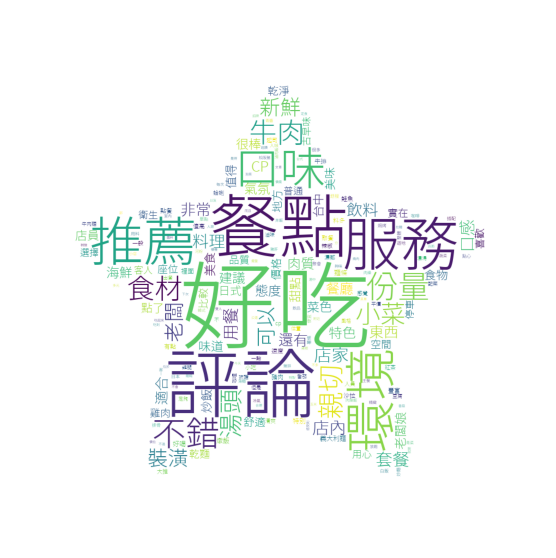

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import jieba
from collections import Counter
from PIL import Image
import numpy as np
import requests
text = open('gm1.csv', "r",encoding="utf-8").read()
jieba.set_dictionary('dict.txt')
#with open('stopWord_cloud.txt', 'r', encoding='utf-8-sig') as f:
with open('stop.txt', 'r', encoding='utf-8-sig') as f:
    stops = f.read().split('\n')   
terms = []
for t in jieba.cut(text, cut_all=False):
    if t not in stops:
        terms.append(t)
diction = Counter(terms)
fontfile = requests.get("https://drive.google.com/uc?id=1QdaqR8Setf4HEulrIW79UEV_Lg_fuoWz&export=download")
with open('taipei_sans_tc_beta.ttf', 'wb') as f:
  f.write(fontfile.content)
#wordcloud = WordCloud(font_path='taipei_sans_tc_beta.ttf') 
mask = np.array(Image.open("star2.jpg")) 
wordcloud = WordCloud(background_color="white",mask=mask,font_path='taipei_sans_tc_beta.ttf') 
wordcloud.generate_from_frequencies(frequencies=diction)
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
wordcloud.to_file("bookCloud.png")

# ÊÉÖÁ∑íÂàÜÊûê

In [ ]:
!pip install snownlp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 37.6 MB 1.2 MB/s 
  Created wheel for snownlp: filename=snownlp-0.12.3-py3-none-any.whl size=37760963 sha256=680279d4a7e5b07172bdb7d460f931c5619ef89ab37ac842e0c48a44d71b3235
  Stored in directory: /root/.cache/pip/wheels/4a/7a/fe/a5747434679b22a95c93bcf9fa49a988f5d9be56366bdf6c79
Successfully built snownlp


In [ ]:
from snownlp import SnowNLP
from snownlp import sentiment
from snownlp import seg
import pandas as pd

## 1 . ËàäÂè∞‰∏≠Â∏ÇÂçÄ(8ÂçÄ)

In [ ]:
df3  = pd.read_csv('Âè∞‰∏≠ÂõûÂæ© 1.csv', encoding='utf-8-sig')
df3

comment
0    ['ÈüìÂúãÈ∫µÂ•ΩÂêÉÔºåËá≠Ë±ÜËÖêÂæà‰πæÔºåÈ¥®ËÉóÁ°¨Âà∞Âí¨‰∏çÂãïÔºåÂÖ∂‰ªñÊñôÈÉΩÂæàÂ∞ëÔºå‰∏çÂêàÂÄã‰∫∫Âè£Âë≥„ÄÇ ', 'Êé®~ÊúçÂãôÂ•Ω...
1    ['Êó•Âºè‰∫≠ÂúíÈÄ†ÊôØÔºåÂÑ™ÈõÖË£ùÊΩ¢ÔºåË≥ìËá≥Â¶ÇÊ≠∏ÁöÑÊúçÂãôÔºåÊàëÂÄëÈªû‰∫ÜÂ•óÈ§êÔºåÂªöÂ∏´ÁöÑÊâãËóùÂæàÊ£íÔºåÊÄßÂÉπÊØîÂæàÈ´ò ', ...
2    ['Â•ΩÂêÉÂà∞Âì≠‚Ä¶ÁâõËÇâ‰∏≤„ÄÅÈõûËÇâ‰∏≤„ÄÅÁÇíÊ∞¥ËìÆÂíåÈÆ≠È≠öÁÇíÈ£ØÂøÖÈªûÔºÅüòç ', 'È§êÈªû‰∏≠Ë¶è‰∏≠Áü©ÔºåÂè£Âë≥ÈÇÑË°åÂ∞±ÊòØÂá∫...
3    ['ÊùæÈò™Ë±¨„ÄÅÁÑ°È™®ÈõûÁøÖ„ÄÅÊØîÁõÆÈ≠ö‰∏ºÈ£Ø„ÄÅÈõûËõãË±ÜËÖê‰ΩêËöµ‰ªîÈôç„ÄÅÈ¥®ËÉ∏‰∏ºÈ£ØÈÉΩË°®ÁèæÁöÑ‰∏çÈåØÔºåÊ∑±Â§úÂ•ΩÂ∫ó ', '...
4    ['È§êÈªûÂæàÊúâÁâπËâ≤ÁöÑÂ∫óÂÆ∂ÔºåÊé®Ëñ¶Âè´ÂåñÂ≠êÈõûÁÅ´ÁÉ§È£ØÔºåÊñôÂ§öÂë≥Áæé ËÇâÂèàÂ§ßÂ°äÔºå‰ªΩÈáèÂæàË∂≥Â§†ÔºÅ ', 'È£üÁâ©Á≤æ...
..                                                 ...
145  ['Áí∞Â¢ÉÂæàÊ£íÂèàËàíÊúçÔºåÁâπÂú∞Èªû‰∫ÜÊ≤ñÁπ©È£ØÁ≥∞Â•ΩÂêÉÔºå ÂÖ∂‰ªñÈ§êÈªû‰πüÂæàÊ£í ÂÄºÂæóÊé®Ëñ¶ ', 'ÊàëÂèÉÂÆ∂ÊÑõÂ™ΩÂí™Êúà...
146  ['‰∏ãÂçà4ÈªûÂçäÈñãÂßãÁáüÊ•≠ Âú®ÂéªÈªÉÊòèÂ∏ÇÂ†¥Ë≤∑Ê∞¥ÁÖÆÁéâÁ±≥ÂíåËä±Áî∞Â£ΩÂè∏ÁöÑÁîüÈ≠öÁâáË∑üËüπËÇâ ‰∫∫ÁîüÂúìÊªø ', 'ÈäÖ...
147  ['ÈüìÂºèÊ≥°ËèúÁâõËÇâÁÇíÁÉèÈæç„ÄÅ‰ªÄÈå¶ÁÇíÈ∫µ„ÄÅÁá¥È£ØÈ°ûË∑üÈÆÆËöµÊπØÈÉΩÂ•ΩÂ•ΩÂêÉ! ÊñôÁÆóÂ§öÂàÜÈáè‰πü‰∏çÊúÉÂ§™Â∞ë! ', '...
148  ['‰πüË®±ÊòØÊàëÈªûÈåØÊù±Ë•øÔºåÁÇ∏Ë±ÜËÖêË∑üËå∂Á¢óËí∏‰ª•ÂèäÂë≥ÂôåÊπØ„ÄÅÊâãÊç≤Á≠âÂ∞èËèúÈÉΩÊØîÂ£ΩÂè∏ÊòéÊòüÈ§êÈªû‰ª§‰∫∫È©öË®ù\U000...
149  ['Êµ∑ÈÆÆËàáÈ£ØÁöÑ‰ªΩÈáèÂçÅË∂≥ÔºåËù¶Â≠êÂíåÈÆ≠È≠öÂæàÈÆÆ ÁâõËí°Áµ≤Áï•Èππ Â∫óÂÖßË£ùÊΩ¢Áí∞Â¢ÉÂæàÂ•ΩÔºåÈùûÂ∏∏ËàíÊúç‰∏î‰πæÊ∑® ', ...

[150 rows x 1 columns]

In [ ]:
# sentiment = []
def get_sentiment_cn(text):
    s = SnowNLP(text)
    return s.sentiments

In [ ]:
df3['sentiment'] = df3.comment.apply(get_sentiment_cn)
df3['sentiment']

0      7.353800e-08
1      5.251818e-06
2      3.610525e-06
3      3.627647e-05
4      5.625653e-06
           ...     
145    1.542632e-02
146    4.703140e-10
147    1.933602e-10
148    1.042214e-02
149    2.506617e-06
Name: sentiment, Length: 150, dtype: float64

In [ ]:
df3.head()

comment     sentiment
0  ['ÈüìÂúãÈ∫µÂ•ΩÂêÉÔºåËá≠Ë±ÜËÖêÂæà‰πæÔºåÈ¥®ËÉóÁ°¨Âà∞Âí¨‰∏çÂãïÔºåÂÖ∂‰ªñÊñôÈÉΩÂæàÂ∞ëÔºå‰∏çÂêàÂÄã‰∫∫Âè£Âë≥„ÄÇ ', 'Êé®~ÊúçÂãôÂ•Ω...  7.353800e-08
1  ['Êó•Âºè‰∫≠ÂúíÈÄ†ÊôØÔºåÂÑ™ÈõÖË£ùÊΩ¢ÔºåË≥ìËá≥Â¶ÇÊ≠∏ÁöÑÊúçÂãôÔºåÊàëÂÄëÈªû‰∫ÜÂ•óÈ§êÔºåÂªöÂ∏´ÁöÑÊâãËóùÂæàÊ£íÔºåÊÄßÂÉπÊØîÂæàÈ´ò ', ...  5.251818e-06
2  ['Â•ΩÂêÉÂà∞Âì≠‚Ä¶ÁâõËÇâ‰∏≤„ÄÅÈõûËÇâ‰∏≤„ÄÅÁÇíÊ∞¥ËìÆÂíåÈÆ≠È≠öÁÇíÈ£ØÂøÖÈªûÔºÅüòç ', 'È§êÈªû‰∏≠Ë¶è‰∏≠Áü©ÔºåÂè£Âë≥ÈÇÑË°åÂ∞±ÊòØÂá∫...  3.610525e-06
3  ['ÊùæÈò™Ë±¨„ÄÅÁÑ°È™®ÈõûÁøÖ„ÄÅÊØîÁõÆÈ≠ö‰∏ºÈ£Ø„ÄÅÈõûËõãË±ÜËÖê‰ΩêËöµ‰ªîÈôç„ÄÅÈ¥®ËÉ∏‰∏ºÈ£ØÈÉΩË°®ÁèæÁöÑ‰∏çÈåØÔºåÊ∑±Â§úÂ•ΩÂ∫ó ', '...  3.627647e-05
4  ['È§êÈªûÂæàÊúâÁâπËâ≤ÁöÑÂ∫óÂÆ∂ÔºåÊé®Ëñ¶Âè´ÂåñÂ≠êÈõûÁÅ´ÁÉ§È£ØÔºåÊñôÂ§öÂë≥Áæé ËÇâÂèàÂ§ßÂ°äÔºå‰ªΩÈáèÂæàË∂≥Â§†ÔºÅ ', 'È£üÁâ©Á≤æ...  5.625653e-06

In [ ]:
content1 = df['ÂõûÂæ©'][0]
content1

"['ÈüìÂúãÈ∫µÂ•ΩÂêÉÔºåËá≠Ë±ÜËÖêÂæà‰πæÔºåÈ¥®ËÉóÁ°¨Âà∞Âí¨‰∏çÂãïÔºåÂÖ∂‰ªñÊñôÈÉΩÂæàÂ∞ëÔºå‰∏çÂêàÂÄã‰∫∫Âè£Âë≥„ÄÇ ', 'Êé®~ÊúçÂãôÂ•ΩÂìÅË≥™Â•ΩÔºåÂ∫óÂì°‰πüÂæàË¶™ÂàáÔºåÂá∫È§êÈÄüÂ∫¶Âø´ÔºåÈÖçÂï§ÈÖí‰∏ÄÁ¥öÊ£í ', 'Âè´UEÂ§ñÈÄÅÁöÑÈ§êÈªûÔºåÈô§‰∫ÜÈ∫ªË∑üËæ£‰πãÂ§ñÂÆåÂÖ®‰∏çÈππ„ÄÇÂ¶ÇÊûúÊúâËÉ°Ê§íÈπΩÊáâË©≤Ë¶ÅÂè¶Â§ñÂåÖ‰∏ÄÂåÖÁµ¶È°ßÂÆ¢„ÄÇ ']"

In [ ]:
import pandas as pd
import re

# ËÆÄÂèñË≥áÊñô
df = pd.read_excel('Âè∞‰∏≠_all.xlsx')
# print(df.info())
# ÂéªÊéâÁ©∫ÂÄºÁöÑÂàó
df = df.dropna(axis=0)
content = df['ÂõûÂæ©']

# ÂéªÈô§‰∏Ä‰∫õÁÑ°Áî®ÁöÑÂ≠óÂÖÉ Âè™ÊèêÂèñÂá∫‰∏≠ÊñáÂá∫‰æÜ
content = [''.join(re.findall('[\u4e00-\u9fa5]+', item, re.S)) for item in content]
scores = [SnowNLP(i).sentiments for i in content]
emotions = []
for i in scores:
    if i >= 0.75:
        emotions.append('Â•ΩË©ï')
    elif 0.45 <= i < 0.75:
        emotions.append('‰∏≠Ë©ï')
    else:
        emotions.append('Â∑ÆË©ï')

df['ÊÉÖÁ∑íÂàÜÊï∏'] = scores
df['Ë©ïÂÉπ'] = emotions
df.to_excel('NLP_COMMENT.xlsx')

In [ ]:
df['ÊÉÖÁ∑íÂàÜÊï∏'].describe()

count    1.500000e+02
mean     3.763407e-01
std      4.319823e-01
min      8.817573e-10
25%      9.178495e-04
50%      9.988249e-02
75%      9.432710e-01
max      9.999995e-01
Name: ÊÉÖÁ∑íÂàÜÊï∏, dtype: float64

In [ ]:
df['ÊÉÖÁ∑íÂàÜÊï∏'].mean() 

0.37634065895539215

In [ ]:
df['ÊÉÖÁ∑íÂàÜÊï∏'].median()

0.099882492054581

In [ ]:
df[:10]

Â∫óÂêç  \
0        È∫ªËæ£ È∫ªÈ¨•Âπ≤Èçã ÂñùÈÖíËÅöÊúÉ/Âè∞‰∏≠ÁæéÈ£ü/Ë•øÂçÄÊôöÈ§ê/Ë•øÂçÄÂÆµÂ§ú/Ë•øÂçÄÈ∫ªËæ£/ÊôöÈ§êÁæéÈ£ü/Âã§ÁæéÂÆµÂ§ú/   
1  Âç∑Âç∑Â∫µÊó•ÂºèÊñôÁêÜÔΩúÁÑ°ËèúÂñÆÊñôÁêÜÔΩúÁîüÈ≠öÁâáÔΩúÂè∞‰∏≠ÁæéÈ£üÔΩúÔΩúÂã§ÁæéÁæéÈ£üÔΩúÂØ©Ë®àÊñ∞ÊùëÔΩúÂè∞‰∏≠ÁáíÁÉ§Â∫óÔΩúÁèæÊ¶®ÁîüÂï§ÈÖíÔΩú...   
2                       ÂçØÊúàÂ±ÖÈÖíÂ±ãÔΩúË•øÂçÄÂ±ÖÈÖíÂ±ãÔΩúÂè∞‰∏≠Â±ÖÈÖíÂ±ãÊé®Ëñ¶ÔΩúË•øÂçÄÁæéÈ£üÔΩú‰∏≤ÁáíÔΩú   
3                                              Á®ª¬∑È∫•È£üÂ†Ç   
4                                  Offer OhÊò®Êó•Ëä±Âç∑ Ë∑®ÁïåÂ•ΩÈ£ü   
5      Êó•È¶ôÁ≤øÂ∫ó/Âè∞‰∏≠ÁæéÈ£ü/Âè∞‰∏≠Â∞èÂêÉ/Âè∞‰∏≠Á¢óÁ≤ø/Âè∞‰∏≠ÂõõÁ•ûÊπØ/Âè∞‰∏≠Á≤øÂ∫ó/Ë•øÂçÄÁæéÈ£ü/Ë•øÂçÄÂ∞èÂêÉ/Ë•øÂçÄÂøÖÂêÉ   
6                              ÈÅäÁâßÈ§êÊ°åNomadic Trattoria   
7                                               Â∞èÂºÑÊãâÈ∫µ   
8                                            È•ï‰πãÈÑâÊùéÂßêÁöÑÂ∫ó   
9                                              ÂóéÂì™ÈóúÊù±ÁÖÆ   

                                                  Á∂≤ÂùÄ   ÊòüÁ¥ö    Ë©ïË´ñ  \
0  https://www.google.com.tw/maps/place/%E9%BA%BB...  4.5   239   
1  https://www.google.com.tw/maps/place/%E5%8D%B7...  4.1   360   
2  https://www.google.com.tw/maps/place/%E5%8D%AF...  4.7    97   
3  https://www.google.com.tw/maps/place/%E7%A8%BB...  4.5   417   
4  https://www.google.com.tw/maps/place/Offer+Oh%...  4.4  3178   
5  https://www.google.com.tw/maps/place/%E6%97%A5...  4.5   160   
6  https://www.google.com.tw/maps/place/%E9%81%8A...  4.7   457   
7  https://www.google.com.tw/maps/place/%E5%B0%8F...  4.4   627   
8  https://www.google.com.tw/maps/place/%E9%A5%95...  4.0  3944   
9  https://www.google.com.tw/maps/place/%E5%97%8E...  4.3   541   

                                                  ÂõûÂæ©                    Âú∞ÂùÄ  \
0  ['ÈüìÂúãÈ∫µÂ•ΩÂêÉÔºåËá≠Ë±ÜËÖêÂæà‰πæÔºåÈ¥®ËÉóÁ°¨Âà∞Âí¨‰∏çÂãïÔºåÂÖ∂‰ªñÊñôÈÉΩÂæàÂ∞ëÔºå‰∏çÂêàÂÄã‰∫∫Âè£Âë≥„ÄÇ ', 'Êé®~ÊúçÂãôÂ•Ω...      403Âè∞‰∏≠Â∏ÇË•øÂçÄÂçöÈ§®‰∏âË°ó148Ëôü   
1  ['Êó•Âºè‰∫≠ÂúíÈÄ†ÊôØÔºåÂÑ™ÈõÖË£ùÊΩ¢ÔºåË≥ìËá≥Â¶ÇÊ≠∏ÁöÑÊúçÂãôÔºåÊàëÂÄëÈªû‰∫ÜÂ•óÈ§êÔºåÂªöÂ∏´ÁöÑÊâãËóùÂæàÊ£íÔºåÊÄßÂÉπÊØîÂæàÈ´ò ', ...        403Âè∞‰∏≠Â∏ÇË•øÂçÄ‰∏≠ËààË°ó82Ëôü   
2  ['Â•ΩÂêÉÂà∞Âì≠‚Ä¶ÁâõËÇâ‰∏≤„ÄÅÈõûËÇâ‰∏≤„ÄÅÁÇíÊ∞¥ËìÆÂíåÈÆ≠È≠öÁÇíÈ£ØÂøÖÈªûÔºÅüòç ', 'È§êÈªû‰∏≠Ë¶è‰∏≠Áü©ÔºåÂè£Âë≥ÈÇÑË°åÂ∞±ÊòØÂá∫...       403Âè∞‰∏≠Â∏ÇË•øÂçÄ‰∏≠ÁæéË°ó462Ëôü   
3  ['ÊùæÈò™Ë±¨„ÄÅÁÑ°È™®ÈõûÁøÖ„ÄÅÊØîÁõÆÈ≠ö‰∏ºÈ£Ø„ÄÅÈõûËõãË±ÜËÖê‰ΩêËöµ‰ªîÈôç„ÄÅÈ¥®ËÉ∏‰∏ºÈ£ØÈÉΩË°®ÁèæÁöÑ‰∏çÈåØÔºåÊ∑±Â§úÂ•ΩÂ∫ó ', '...      403Âè∞‰∏≠Â∏ÇË•øÂçÄ‰∫îÊ¨ä‰∫îË°ó138Ëôü   
4  ['È§êÈªûÂæàÊúâÁâπËâ≤ÁöÑÂ∫óÂÆ∂ÔºåÊé®Ëñ¶Âè´ÂåñÂ≠êÈõûÁÅ´ÁÉ§È£ØÔºåÊñôÂ§öÂë≥Áæé ËÇâÂèàÂ§ßÂ°äÔºå‰ªΩÈáèÂæàË∂≥Â§†ÔºÅ ', 'È£üÁâ©Á≤æ...        403Âè∞‰∏≠Â∏ÇË•øÂçÄÂø†Ë™†Ë°ó91Ëôü   
5  ['Áî®È§êÁí∞Â¢ÉËàíÈÅ©Áí∞Â¢É‰πæÊ∑®ÔºåÁ¢óÁ≤øÂ•ΩÂêÉÈ§°ÊñôË±êÂØåÂØ¶Âú®ÔºåÁ∂úÂêàÊπØÊπØÈ†≠Ê∏ÖÁîúÊñôÂ§öÂ§öÔºÅcpÂÄºÂ•ΩÈ´òÔºÅ ', '...       403Âè∞‰∏≠Â∏ÇË•øÂçÄÂ§ßÂêåË°ó208Ëôü   
6  ['ÊñáÈùíÈ¢®ÔΩûÁÑ∂ÂæåÊúâÂÖ©ÈöªÂèØÊÑõÁàÜË°®Â∞èÊ©òË≤ìÔºÅÈ§êÈªûÁöÑË©±Êé®Ëñ¶Ë±¨ËÖ≥ÔºåÁæäÊéíËÇâË≥™ÊØîËºÉÊü¥„ÄÇÈÖçËèúÈÉΩ‰∏çÈåØÔΩû ', ...       403Âè∞‰∏≠Â∏ÇË•øÂçÄÂø†Âã§Ë°ó184Ëôü   
7  ['Ë∂ÖÂ§ßË±¨ËÇãÊéíÂíåÊøÉÈÉÅÊπØÈ†≠ÔºåÂ∞èËèú‰πüÂæàÂ•ΩÂêÉÔºåÈªûÈ§êÁî®ËìãÁ´†ÁöÑÂæàÁâπÂà•ÔºåÂ∫óÈù¢ÂæàÊúâÊó•Êú¨È¢® ', 'È©öËâ∑ÁöÑÊãâ...     403Âè∞‰∏≠Â∏ÇË•øÂçÄÂêë‰∏äÂçóË∑Ø‰∏ÄÊÆµ74Ëôü   
8  ['Â∫óÂÖßÊØèÊ®£Êù±Ë•øÈÉΩÂ•ΩÂêÉ Â∞èËèúË∂ÖÊ£íÁöÑ ÊúÄÂñúÊ≠°ÈÆ≠È≠öÁÇíÈ£ØË∑üÈùíËèúËõãËä±ÊπØ ', 'ÊπØÂåÖÊôÆÈÄöÔºåË±¨ËÇâÊç≤È§ÖÂ§™...     403Âè∞‰∏≠Â∏ÇË•øÂçÄÂêë‰∏äË∑Ø‰∏ÄÊÆµ353Ëôü   
9  ['ÂæàÂèØÊÑõÁöÑÂ∑∑ÂºÑÂ∞èÂ∫óÔºåË£ùÊΩ¢Âè§Ëâ≤Âè§È¶ôÔºåÈóúÊù±ÁÖÆÈ£üÊùêÁ®ÆÈ°ûÂæàÂ§öÔºåÂæàÂ§öÂ∞ëË¶ãÈ£üÊùêÔºåËæ£Âë≥ÊπØÈ†≠ÂæàÁâπÂà• ', ...  403Âè∞‰∏≠Â∏ÇË•øÂçÄÁæéÊùëË∑Ø‰∏ÄÊÆµ164Â∑∑15Ëôü   

       ÊÉÖÁ∑íÂàÜÊï∏  Ë©ïÂÉπ  
0  0.002805  Â∑ÆË©ï  
1  0.039043  Â∑ÆË©ï  
2  0.599081  ‰∏≠Ë©ï  
3  0.500484  ‰∏≠Ë©ï  
4  0.005798  Â∑ÆË©ï  
5  0.011184  Â∑ÆË©ï  
6  0.769322  Â•ΩË©ï  
7  0.020311  Â∑ÆË©ï  
8  0.249653  Â∑ÆË©ï  
9  0.021264  Â∑ÆË©ï

In [ ]:
df['Ë©ïÂÉπ'].value_counts()

Â∑ÆË©ï    93
Â•ΩË©ï    48
‰∏≠Ë©ï     9
Name: Ë©ïÂÉπ, dtype: int64

##2 .  Âè∞‰∏≠Â∏ÇÂÖ®ÂçÄ

### 2.1 Ë≥áÊñôÊï¥ÁêÜ:ÊâæÂá∫Ê≤íÊúâÂõûÂæ©ÁöÑÂ∫óÂÆ∂

In [ ]:
fliter = (test1['ÂõûÂæ©'] == "[]")
test1[fliter]

Â∫óÂêç  \
8                                             Âè∞‰∏≠Â®ÅÊ±ÄÂüéÂ∏ÇÈÖíÂ∫ó   
35                                          Á¶èÂÆπÂ§ßÈ£ØÂ∫ó È∫óÂØ∂Ê®ÇÂúí   
130                                               Ê¢®Â±±Ë≥ìÈ§®   
131                                           Á•ûÊú®Ë∞∑ÂÅáÊúüÂ§ßÈ£ØÂ∫ó   
138                                               ÂΩ©ËôπÂ±±Ëàç   
145                                               Ê°ÉÊùéÊ≤≥Áïî   
163                                               Á¥ÖÈªûÊñáÊóÖ   
166                                            Âè∞‰∏≠ÂØå‰ø°Â§ßÈ£ØÂ∫ó   
167                                 CHECK inn ÈõÄÂÆ¢ÊóÖÈ§®Âè∞‰∏≠Â∏ÇÂ∫ú   
169                                   Êñ∞ÁõõÊ©ãË°åÊóÖS.S.B-Hotel   
501  GetCha Hostel & Bistro-È§êÈÖíÈ§®|ÈÖíÂêß|ÈùíÂπ¥ÊóÖÈ§®|‰∏Ä‰∏≠È§êÂª≥|Bar|Âè∞‰∏≠...   
548                                      Èö±ÂíåÊóÖINNK Hotel   
721                                The Maple Cafe Ê•ìËëâÂíñÂï°   

                                                    Á∂≤ÂùÄ   ÊòüÁ¥ö    Ë©ïË´ñ  ÂõûÂæ©  \
8    https://www.google.com.tw/maps/place/%E5%8F%B0...  4.2  1536  []   
35   https://www.google.com.tw/maps/place/%E7%A6%8F...  4.3  4030  []   
130  https://www.google.com.tw/maps/place/%E6%A2%A8...  4.1  6634  []   
131  https://www.google.com.tw/maps/place/%E7%A5%9E...  4.1  1426  []   
138  https://www.google.com.tw/maps/place/%E5%BD%A9...  4.3   584  []   
145  https://www.google.com.tw/maps/place/%E6%A1%83...  4.3  2729  []   
163  https://www.google.com.tw/maps/place/%E7%B4%85...  4.3  1388  []   
166  https://www.google.com.tw/maps/place/%E5%8F%B0...  4.1  1042  []   
167  https://www.google.com.tw/maps/place/CHECK+inn...  4.4  1693  []   
169  https://www.google.com.tw/maps/place/%E6%96%B0...  4.4   842  []   
501  https://www.google.com.tw/maps/place/GetCha+Ho...  4.4   816  []   
548  https://www.google.com.tw/maps/place/%E9%9A%B1...  4.5  1179  []   
721  https://www.google.com.tw/maps/place/The+Maple...  4.5   536  []   

                        Âú∞ÂùÄ  
8       428Âè∞‰∏≠Â∏ÇÂ§ßÈõÖÂçÄÊ∞ëÁîüË∑Ø‰∏ÄÊÆµ100Ëôü  
35         421Âè∞‰∏≠Â∏ÇÂêéÈáåÂçÄÁ¶èÂÆπË∑Ø88Ëôü  
130        424Âè∞‰∏≠Â∏ÇÂíåÂπ≥ÂçÄ‰∏≠Ê≠£Ë∑Ø91Ëôü  
131    424Âè∞‰∏≠Â∏ÇÂíåÂπ≥ÂçÄÊù±ÈóúË∑Ø‰∏ÄÊÆµÊ∫´Ê≥âÂ∑∑7Ëôü  
138     422Âè∞‰∏≠Â∏ÇÁü≥Â≤°ÂçÄÂíåÁõõË°óÂçóÁúâÂ∑∑10Ëôü  
145      426Âè∞‰∏≠Â∏ÇÊñ∞Á§æÂçÄ‰∏≠ËààË°ó98-1Ëôü  
163        400Âè∞‰∏≠Â∏Ç‰∏≠ÂçÄÊ∞ëÊóèË∑Ø206Ëôü  
166         400Âè∞‰∏≠Â∏Ç‰∏≠ÂçÄÂ∏ÇÂ∫úË∑Ø14Ëôü  
167         400Âè∞‰∏≠Â∏Ç‰∏≠ÂçÄÂ∏ÇÂ∫úË∑Ø38Ëôü  
169         400Âè∞‰∏≠Â∏Ç‰∏≠ÂçÄ‰∏≠Â±±Ë∑Ø26Ëôü  
501        404Âè∞‰∏≠Â∏ÇÂåóÂçÄ‰∏Ä‰∏≠Ë°ó166Ëôü  
548  407Âè∞‰∏≠Â∏ÇË•øÂ±ØÂçÄË•øÂ±ØË∑Ø‰∫åÊÆµ272-16Ëôü  
721      406Âè∞‰∏≠Â∏ÇÂåóÂ±ØÂçÄÂ§™ÂíåË∑Ø‰∫åÊÆµ39Ëôü

## 2.2 Âà™Èô§Ë≥áÊñô

In [ ]:
test1 = test1[-test1.ÂõûÂæ©.isin(['[]'])]
test1

Â∫óÂêç  \
0                         ÁéãÁî∞ÈµùËÇâ   
1                       ÂìÅÈ¶ôÊâãÂ∑•ËÇâÂåÖ   
2                         Â§ßËÇöÂ§úÂ∏Ç   
3                    Âè∞‰∏≠Â§ßËÇöÂçÄËá™Âº∑Êó©Â∏Ç   
4                   ËíôÂè§ËçâÂéüÈ§äÁîüÈ∫ªËæ£ÁÅ´Èçã   
..                         ...   
891                      Â§ñÁí∞309   
892                  Èô∂ÊùøÂ±ã Ë±êÂéüÂêëÈôΩÂ∫ó   
893                    ‰ø°Áæ©Â§ßËÖ∏Ë±¨Ë°ÄÊπØ   
894                   Âè≤ÊèêÂÖãÁâõÊéíË±êÂéüÂ∫ó   
895  È§äÈçã Yang Guo Áü≥È†≠Ê∂ÆÊ∂ÆÈçã (Âè∞‰∏≠Ë±êÂéüÂ∫ó)   

                                                    Á∂≤ÂùÄ   ÊòüÁ¥ö    Ë©ïË´ñ  \
0    https://www.google.com.tw/maps/place/%E7%8E%8B...  4.3  1177   
1    https://www.google.com.tw/maps/place/%E5%93%81...  4.3   735   
2    https://www.google.com.tw/maps/place/%E5%A4%A7...  4.1  1183   
3    https://www.google.com.tw/maps/place/%E5%8F%B0...  4.1  1572   
4    https://www.google.com.tw/maps/place/%E8%92%99...  4.3   815   
..                                                 ...  ...   ...   
891  https://www.google.com.tw/maps/place/%E5%A4%96...  4.2  1121   
892  https://www.google.com.tw/maps/place/%E9%99%B6...  4.1  1657   
893  https://www.google.com.tw/maps/place/%E4%BF%A1...  4.2   594   
894  https://www.google.com.tw/maps/place/%E5%8F%B2...  4.7  3879   
895  https://www.google.com.tw/maps/place/%E9%A4%8A...  4.7  1751   

                                                    ÂõûÂæ©                    Âú∞ÂùÄ  
0    ['ÊπØÂÜ¨Á≤âÈ∫µÂ•ΩÂêÉÔºåÂê∏ÊªøÊπØÊ±ÅÁöÑÈ∫µÊ¢ù‰∏ÄÁ¢óË¶∫Âæó‰∏çÂ§†ÔºåÁáôÁ©∫ÂøÉËèúÈÆÆÁ∂†ËÑÜÂ´©', 'Âçó‰∏ãÁéãÁî∞‰∫§ÊµÅÈÅì‰∏ãÂéªÂæàËøë...    432Âè∞‰∏≠Â∏ÇÂ§ßËÇöÂçÄÊ≤ôÁî∞Ë∑Ø‰∏ÄÊÆµ260Ëôü  
1    ['Â∞èÂ≠©ÂñúÊ≠°Á≠çËÇâÂåÖÔºå Áà∏Áà∏ÂñúÊ≠°ÈÆÆËÇâÂåÖÔºå Â™ΩÂ™ΩÂñúÊ≠°ËäãÈ†≠È•ÖÈ†≠ÔºàÊúâÈ°ÜÁ≤íÊØîÈªëÁ≥ñÈ•ÖÈ†≠È¶ôÔºâ', 'ÊóÖÈÄîÁ∂ì...    432Âè∞‰∏≠Â∏ÇÂ§ßËÇöÂçÄÊ≤ôÁî∞Ë∑Ø‰∏ÄÊÆµ813Ëôü  
2    ['ÁæéÈ£üÊé®Ëñ¶ÔºöËÉ°Ê§íÈ§ÖÔºàÊãîÁµ≤Ëµ∑Âè∏Ë∂ÖÊ£íÔºâ„ÄÅËó•ÁáâÊéíÈ™®„ÄÅËöµ‰ªîÈ∫µÁ∑ö‚Ä¶ÔºÅ', 'Âú∞ÊñπÁöÑÂ∞èÂ§úÂ∏ÇÔºåÂú®Âú∞‰∫∫ÊàëÊòü...       432Âè∞‰∏≠Â∏ÇÂ§ßËÇöÂçÄÊ¶ÆËèØË°ó24Ëôü  
3    ['ÔºÉËî¨ÊûúÁìúË±ÜËñØËèáÔºàÈÆÆËä±Ôºâ‰∏çÁº∫ÔºåË±ÜËÖêÔºåÁ¥†È£üÔºå‰∏∏Â≠êÔºåÁáíÁÉ§Êª∑Âë≥ÔºåÈ∫µÊ¢ùÊ∞¥È§ÉÊ∑∑Ê≤åÁöÆÈÉΩÂà∞„ÄÇ', 'ÊúâÂ•Ω...  432Âè∞‰∏≠Â∏ÇÂ§ßËÇöÂçÄÈÅäÂúíË∑Ø‰∫åÊÆµ203Â∑∑3ÂºÑ  
4    ['ÊπØÈ†≠Â•ΩÔºåËèúÂ§öÔºåÊúâÂíñÂï°„ÄÅÁÉèÊ¢ÖÊ±Å„ÄÅÂèØÊ®Ç„ÄÅÊòéÊ≤ªÂÜ∞Ê∑áÊ∑ã„ÄÇ', 'È£Ω„ÄÇüòãüòãüòã ‰ΩêÊñôÂçÄÔºåÊúâËæ£Ê§íËíúÊ≥•Ëî•...    428Âè∞‰∏≠Â∏ÇÂ§ßÈõÖÂçÄÈõÖÁí∞Ë∑Ø‰∫åÊÆµ145Ëôü  
..                                                 ...                   ...  
891  ['Âª£Â∑ûÁÇíÈ£Ø„ÄÅÈÆÆËù¶ËÖêÁöÆÂç∑„ÄÅÁ≥ØÁ±≥Èõû„ÄÅÁÉ§ËÑÜÁöÆÈõû„ÄÅÊ∏ØÂºèËòøËîîÁ≥ï ÈÉΩÂæàÂ•ΩÂêÉ„ÄÇ', 'ÈÄôË£°ÁöÑÂè∞ËèúÊ∏ØËèúÂêÑÊñπ...   420Âè∞‰∏≠Â∏ÇË±êÂéüÂçÄË±êÂéüÂ§ßÈÅì‰∏ÄÊÆµ309Ëôü  
892  ['È§êÈªûÂ•ΩÂêÉÂæàË≤ºÂøÉÊúçÂãôÁÖßÈ°ßÂ∞èÊúãÂèãÁöÑÈúÄÊ±ÇÔºåÂÄºÂæóÊé®Ëñ¶ÔºåË¨ùË¨ùÂ∫óÂÆ∂ÁöÑÁî®ÂøÉ', 'ÂÅúËªä‰∏çÊñπ‰æøÔºå‰ΩÜÂÖßÈÉ®Ë£ù...  420Âè∞‰∏≠Â∏ÇË±êÂéüÂçÄÂêëÈôΩË∑Ø130ËôüB1-2  
893  ['Ê¢ÖËä±ËÇâÊúâÈªûÂÉèÊãâÈ∫µÁöÑÂèâÁáíÔºåÈÇÑ‰∏çÈåØÂêÉÔºåÂè™ÊòØÈÜ¨Ê±Å‰∏çÂ§ö‰∏çÂ§†‰∏ãÈ£ØÔºåÁ±≥È£ØÂè£ÊÑüÊàë‰∏çÊÑõÊâÄ‰ª•Ê≤íÂêÉÂÆå', '...     420Âè∞‰∏≠Â∏ÇË±êÂéüÂçÄ‰ø°Áæ©Ë°ó41-1Ëôü  
894  ['ÁæéÂºèÊéíÈ§êÔºåÈ§êÈªû‰∏çÈåØÔºåÊ∞£Ê∞õÂ•Ω,‰ΩÜÈÉ®ÂàÜËÇâÂìÅÊúâÈÜÉÊº¨ÈÅéÔºåÂñúÊ≠°ÂéüÂë≥ÁöÑË´ãÊ≥®ÊÑè„ÄÇ', 'ÊúçÂãôË∂ÖËÆöÔºåÁâõÊéí...     420Âè∞‰∏≠Â∏ÇË±êÂéüÂçÄÂúìÁí∞Êù±Ë∑Ø419Ëôü  
895  ['ÈÅ∏ÊìáÁ®ÆÈ°ûÁúæÂ§öÔºåÈ£üÊùê‰πüÈùûÂ∏∏Êñ∞ÈÆÆÔºåÊ∞£Ê∞õÁí∞Â¢ÉÂæàÂ•ΩÔºåÊù±Ë•øÂ•ΩÂêÉÔºåÈáçÈªûÊòØÂ∫óÂì°ÊúçÂãôËÆöËÆöÔºÅ', 'ÂÜ∞ÂìÅÊòØ...       420Âè∞‰∏≠Â∏ÇË±êÂéüÂçÄÂíåÂπ≥Ë°ó21Ëôü  

[883 rows x 6 columns]

## 2.3 ÈÄ≤Ë°åsnowNLP

In [ ]:
import pandas as pd
import re

# test1 = pd.read_csv('all_csv.csv',encoding='utf-8-sig')

test1 = test1.dropna(axis=0)
content1 = test1['ÂõûÂæ©']


content1 = [''.join(re.findall('[\u4e00-\u9fa5]+', item, re.S)) for item in content1]
scores1 = [SnowNLP(i).sentiments for i in content1]
emotions1 = []
for i in scores1:
    if i >= 0.75:
        emotions1.append('Â•ΩË©ï')
    elif 0.45 <= i < 0.75:
        emotions1.append('‰∏≠Ë©ï')
    else:
        emotions1.append('Â∑ÆË©ï')

test1['ÂàÜÊï∏'] = scores1
test1['Ë©ïÂÉπ'] = emotions1
test1.to_csv('NLP_COMMENT_3.csv')

In [ ]:
test1

Â∫óÂêç  \
0                         ÁéãÁî∞ÈµùËÇâ   
1                       ÂìÅÈ¶ôÊâãÂ∑•ËÇâÂåÖ   
2                         Â§ßËÇöÂ§úÂ∏Ç   
3                    Âè∞‰∏≠Â§ßËÇöÂçÄËá™Âº∑Êó©Â∏Ç   
4                   ËíôÂè§ËçâÂéüÈ§äÁîüÈ∫ªËæ£ÁÅ´Èçã   
..                         ...   
891                      Â§ñÁí∞309   
892                  Èô∂ÊùøÂ±ã Ë±êÂéüÂêëÈôΩÂ∫ó   
893                    ‰ø°Áæ©Â§ßËÖ∏Ë±¨Ë°ÄÊπØ   
894                   Âè≤ÊèêÂÖãÁâõÊéíË±êÂéüÂ∫ó   
895  È§äÈçã Yang Guo Áü≥È†≠Ê∂ÆÊ∂ÆÈçã (Âè∞‰∏≠Ë±êÂéüÂ∫ó)   

                                                    Á∂≤ÂùÄ   ÊòüÁ¥ö    Ë©ïË´ñ  \
0    https://www.google.com.tw/maps/place/%E7%8E%8B...  4.3  1177   
1    https://www.google.com.tw/maps/place/%E5%93%81...  4.3   735   
2    https://www.google.com.tw/maps/place/%E5%A4%A7...  4.1  1183   
3    https://www.google.com.tw/maps/place/%E5%8F%B0...  4.1  1572   
4    https://www.google.com.tw/maps/place/%E8%92%99...  4.3   815   
..                                                 ...  ...   ...   
891  https://www.google.com.tw/maps/place/%E5%A4%96...  4.2  1121   
892  https://www.google.com.tw/maps/place/%E9%99%B6...  4.1  1657   
893  https://www.google.com.tw/maps/place/%E4%BF%A1...  4.2   594   
894  https://www.google.com.tw/maps/place/%E5%8F%B2...  4.7  3879   
895  https://www.google.com.tw/maps/place/%E9%A4%8A...  4.7  1751   

                                                    ÂõûÂæ©                    Âú∞ÂùÄ  \
0    ['ÊπØÂÜ¨Á≤âÈ∫µÂ•ΩÂêÉÔºåÂê∏ÊªøÊπØÊ±ÅÁöÑÈ∫µÊ¢ù‰∏ÄÁ¢óË¶∫Âæó‰∏çÂ§†ÔºåÁáôÁ©∫ÂøÉËèúÈÆÆÁ∂†ËÑÜÂ´©', 'Âçó‰∏ãÁéãÁî∞‰∫§ÊµÅÈÅì‰∏ãÂéªÂæàËøë...    432Âè∞‰∏≠Â∏ÇÂ§ßËÇöÂçÄÊ≤ôÁî∞Ë∑Ø‰∏ÄÊÆµ260Ëôü   
1    ['Â∞èÂ≠©ÂñúÊ≠°Á≠çËÇâÂåÖÔºå Áà∏Áà∏ÂñúÊ≠°ÈÆÆËÇâÂåÖÔºå Â™ΩÂ™ΩÂñúÊ≠°ËäãÈ†≠È•ÖÈ†≠ÔºàÊúâÈ°ÜÁ≤íÊØîÈªëÁ≥ñÈ•ÖÈ†≠È¶ôÔºâ', 'ÊóÖÈÄîÁ∂ì...    432Âè∞‰∏≠Â∏ÇÂ§ßËÇöÂçÄÊ≤ôÁî∞Ë∑Ø‰∏ÄÊÆµ813Ëôü   
2    ['ÁæéÈ£üÊé®Ëñ¶ÔºöËÉ°Ê§íÈ§ÖÔºàÊãîÁµ≤Ëµ∑Âè∏Ë∂ÖÊ£íÔºâ„ÄÅËó•ÁáâÊéíÈ™®„ÄÅËöµ‰ªîÈ∫µÁ∑ö‚Ä¶ÔºÅ', 'Âú∞ÊñπÁöÑÂ∞èÂ§úÂ∏ÇÔºåÂú®Âú∞‰∫∫ÊàëÊòü...       432Âè∞‰∏≠Â∏ÇÂ§ßËÇöÂçÄÊ¶ÆËèØË°ó24Ëôü   
3    ['ÔºÉËî¨ÊûúÁìúË±ÜËñØËèáÔºàÈÆÆËä±Ôºâ‰∏çÁº∫ÔºåË±ÜËÖêÔºåÁ¥†È£üÔºå‰∏∏Â≠êÔºåÁáíÁÉ§Êª∑Âë≥ÔºåÈ∫µÊ¢ùÊ∞¥È§ÉÊ∑∑Ê≤åÁöÆÈÉΩÂà∞„ÄÇ', 'ÊúâÂ•Ω...  432Âè∞‰∏≠Â∏ÇÂ§ßËÇöÂçÄÈÅäÂúíË∑Ø‰∫åÊÆµ203Â∑∑3ÂºÑ   
4    ['ÊπØÈ†≠Â•ΩÔºåËèúÂ§öÔºåÊúâÂíñÂï°„ÄÅÁÉèÊ¢ÖÊ±Å„ÄÅÂèØÊ®Ç„ÄÅÊòéÊ≤ªÂÜ∞Ê∑áÊ∑ã„ÄÇ', 'È£Ω„ÄÇüòãüòãüòã ‰ΩêÊñôÂçÄÔºåÊúâËæ£Ê§íËíúÊ≥•Ëî•...    428Âè∞‰∏≠Â∏ÇÂ§ßÈõÖÂçÄÈõÖÁí∞Ë∑Ø‰∫åÊÆµ145Ëôü   
..                                                 ...                   ...   
891  ['Âª£Â∑ûÁÇíÈ£Ø„ÄÅÈÆÆËù¶ËÖêÁöÆÂç∑„ÄÅÁ≥ØÁ±≥Èõû„ÄÅÁÉ§ËÑÜÁöÆÈõû„ÄÅÊ∏ØÂºèËòøËîîÁ≥ï ÈÉΩÂæàÂ•ΩÂêÉ„ÄÇ', 'ÈÄôË£°ÁöÑÂè∞ËèúÊ∏ØËèúÂêÑÊñπ...   420Âè∞‰∏≠Â∏ÇË±êÂéüÂçÄË±êÂéüÂ§ßÈÅì‰∏ÄÊÆµ309Ëôü   
892  ['È§êÈªûÂ•ΩÂêÉÂæàË≤ºÂøÉÊúçÂãôÁÖßÈ°ßÂ∞èÊúãÂèãÁöÑÈúÄÊ±ÇÔºåÂÄºÂæóÊé®Ëñ¶ÔºåË¨ùË¨ùÂ∫óÂÆ∂ÁöÑÁî®ÂøÉ', 'ÂÅúËªä‰∏çÊñπ‰æøÔºå‰ΩÜÂÖßÈÉ®Ë£ù...  420Âè∞‰∏≠Â∏ÇË±êÂéüÂçÄÂêëÈôΩË∑Ø130ËôüB1-2   
893  ['Ê¢ÖËä±ËÇâÊúâÈªûÂÉèÊãâÈ∫µÁöÑÂèâÁáíÔºåÈÇÑ‰∏çÈåØÂêÉÔºåÂè™ÊòØÈÜ¨Ê±Å‰∏çÂ§ö‰∏çÂ§†‰∏ãÈ£ØÔºåÁ±≥È£ØÂè£ÊÑüÊàë‰∏çÊÑõÊâÄ‰ª•Ê≤íÂêÉÂÆå', '...     420Âè∞‰∏≠Â∏ÇË±êÂéüÂçÄ‰ø°Áæ©Ë°ó41-1Ëôü   
894  ['ÁæéÂºèÊéíÈ§êÔºåÈ§êÈªû‰∏çÈåØÔºåÊ∞£Ê∞õÂ•Ω,‰ΩÜÈÉ®ÂàÜËÇâÂìÅÊúâÈÜÉÊº¨ÈÅéÔºåÂñúÊ≠°ÂéüÂë≥ÁöÑË´ãÊ≥®ÊÑè„ÄÇ', 'ÊúçÂãôË∂ÖËÆöÔºåÁâõÊéí...     420Âè∞‰∏≠Â∏ÇË±êÂéüÂçÄÂúìÁí∞Êù±Ë∑Ø419Ëôü   
895  ['ÈÅ∏ÊìáÁ®ÆÈ°ûÁúæÂ§öÔºåÈ£üÊùê‰πüÈùûÂ∏∏Êñ∞ÈÆÆÔºåÊ∞£Ê∞õÁí∞Â¢ÉÂæàÂ•ΩÔºåÊù±Ë•øÂ•ΩÂêÉÔºåÈáçÈªûÊòØÂ∫óÂì°ÊúçÂãôËÆöËÆöÔºÅ', 'ÂÜ∞ÂìÅÊòØ...       420Âè∞‰∏≠Â∏ÇË±êÂéüÂçÄÂíåÂπ≥Ë°ó21Ëôü   

           ÂàÜÊï∏  Ë©ïÂÉπ  
0    0.253676  Â∑ÆË©ï  
1    0.005847  Â∑ÆË©ï  
2    0.986092  Â•ΩË©ï  
3    0.000083  Â∑ÆË©ï  
4    0.026050  Â∑ÆË©ï  
..        ...  ..  
891  0.938927  Â•ΩË©ï  
892  0.139586  Â∑ÆË©ï  
893  0.012699  Â∑ÆË©ï  
894  0.003735  Â∑ÆË©ï  
895  0.022019  Â∑ÆË©ï  

[883 rows x 8 columns]

In [ ]:
test1[['Â∫óÂêç','ÊòüÁ¥ö','ÂõûÂæ©','ÂàÜÊï∏','Ë©ïÂÉπ']]

Â∫óÂêç   ÊòüÁ¥ö  \
0                         ÁéãÁî∞ÈµùËÇâ  4.3   
1                       ÂìÅÈ¶ôÊâãÂ∑•ËÇâÂåÖ  4.3   
2                         Â§ßËÇöÂ§úÂ∏Ç  4.1   
3                    Âè∞‰∏≠Â§ßËÇöÂçÄËá™Âº∑Êó©Â∏Ç  4.1   
4                   ËíôÂè§ËçâÂéüÈ§äÁîüÈ∫ªËæ£ÁÅ´Èçã  4.3   
..                         ...  ...   
891                      Â§ñÁí∞309  4.2   
892                  Èô∂ÊùøÂ±ã Ë±êÂéüÂêëÈôΩÂ∫ó  4.1   
893                    ‰ø°Áæ©Â§ßËÖ∏Ë±¨Ë°ÄÊπØ  4.2   
894                   Âè≤ÊèêÂÖãÁâõÊéíË±êÂéüÂ∫ó  4.7   
895  È§äÈçã Yang Guo Áü≥È†≠Ê∂ÆÊ∂ÆÈçã (Âè∞‰∏≠Ë±êÂéüÂ∫ó)  4.7   

                                                    ÂõûÂæ©        ÂàÜÊï∏  Ë©ïÂÉπ  
0    ['ÊπØÂÜ¨Á≤âÈ∫µÂ•ΩÂêÉÔºåÂê∏ÊªøÊπØÊ±ÅÁöÑÈ∫µÊ¢ù‰∏ÄÁ¢óË¶∫Âæó‰∏çÂ§†ÔºåÁáôÁ©∫ÂøÉËèúÈÆÆÁ∂†ËÑÜÂ´©', 'Âçó‰∏ãÁéãÁî∞‰∫§ÊµÅÈÅì‰∏ãÂéªÂæàËøë...  0.253676  Â∑ÆË©ï  
1    ['Â∞èÂ≠©ÂñúÊ≠°Á≠çËÇâÂåÖÔºå Áà∏Áà∏ÂñúÊ≠°ÈÆÆËÇâÂåÖÔºå Â™ΩÂ™ΩÂñúÊ≠°ËäãÈ†≠È•ÖÈ†≠ÔºàÊúâÈ°ÜÁ≤íÊØîÈªëÁ≥ñÈ•ÖÈ†≠È¶ôÔºâ', 'ÊóÖÈÄîÁ∂ì...  0.005847  Â∑ÆË©ï  
2    ['ÁæéÈ£üÊé®Ëñ¶ÔºöËÉ°Ê§íÈ§ÖÔºàÊãîÁµ≤Ëµ∑Âè∏Ë∂ÖÊ£íÔºâ„ÄÅËó•ÁáâÊéíÈ™®„ÄÅËöµ‰ªîÈ∫µÁ∑ö‚Ä¶ÔºÅ', 'Âú∞ÊñπÁöÑÂ∞èÂ§úÂ∏ÇÔºåÂú®Âú∞‰∫∫ÊàëÊòü...  0.986092  Â•ΩË©ï  
3    ['ÔºÉËî¨ÊûúÁìúË±ÜËñØËèáÔºàÈÆÆËä±Ôºâ‰∏çÁº∫ÔºåË±ÜËÖêÔºåÁ¥†È£üÔºå‰∏∏Â≠êÔºåÁáíÁÉ§Êª∑Âë≥ÔºåÈ∫µÊ¢ùÊ∞¥È§ÉÊ∑∑Ê≤åÁöÆÈÉΩÂà∞„ÄÇ', 'ÊúâÂ•Ω...  0.000083  Â∑ÆË©ï  
4    ['ÊπØÈ†≠Â•ΩÔºåËèúÂ§öÔºåÊúâÂíñÂï°„ÄÅÁÉèÊ¢ÖÊ±Å„ÄÅÂèØÊ®Ç„ÄÅÊòéÊ≤ªÂÜ∞Ê∑áÊ∑ã„ÄÇ', 'È£Ω„ÄÇüòãüòãüòã ‰ΩêÊñôÂçÄÔºåÊúâËæ£Ê§íËíúÊ≥•Ëî•...  0.026050  Â∑ÆË©ï  
..                                                 ...       ...  ..  
891  ['Âª£Â∑ûÁÇíÈ£Ø„ÄÅÈÆÆËù¶ËÖêÁöÆÂç∑„ÄÅÁ≥ØÁ±≥Èõû„ÄÅÁÉ§ËÑÜÁöÆÈõû„ÄÅÊ∏ØÂºèËòøËîîÁ≥ï ÈÉΩÂæàÂ•ΩÂêÉ„ÄÇ', 'ÈÄôË£°ÁöÑÂè∞ËèúÊ∏ØËèúÂêÑÊñπ...  0.938927  Â•ΩË©ï  
892  ['È§êÈªûÂ•ΩÂêÉÂæàË≤ºÂøÉÊúçÂãôÁÖßÈ°ßÂ∞èÊúãÂèãÁöÑÈúÄÊ±ÇÔºåÂÄºÂæóÊé®Ëñ¶ÔºåË¨ùË¨ùÂ∫óÂÆ∂ÁöÑÁî®ÂøÉ', 'ÂÅúËªä‰∏çÊñπ‰æøÔºå‰ΩÜÂÖßÈÉ®Ë£ù...  0.139586  Â∑ÆË©ï  
893  ['Ê¢ÖËä±ËÇâÊúâÈªûÂÉèÊãâÈ∫µÁöÑÂèâÁáíÔºåÈÇÑ‰∏çÈåØÂêÉÔºåÂè™ÊòØÈÜ¨Ê±Å‰∏çÂ§ö‰∏çÂ§†‰∏ãÈ£ØÔºåÁ±≥È£ØÂè£ÊÑüÊàë‰∏çÊÑõÊâÄ‰ª•Ê≤íÂêÉÂÆå', '...  0.012699  Â∑ÆË©ï  
894  ['ÁæéÂºèÊéíÈ§êÔºåÈ§êÈªû‰∏çÈåØÔºåÊ∞£Ê∞õÂ•Ω,‰ΩÜÈÉ®ÂàÜËÇâÂìÅÊúâÈÜÉÊº¨ÈÅéÔºåÂñúÊ≠°ÂéüÂë≥ÁöÑË´ãÊ≥®ÊÑè„ÄÇ', 'ÊúçÂãôË∂ÖËÆöÔºåÁâõÊéí...  0.003735  Â∑ÆË©ï  
895  ['ÈÅ∏ÊìáÁ®ÆÈ°ûÁúæÂ§öÔºåÈ£üÊùê‰πüÈùûÂ∏∏Êñ∞ÈÆÆÔºåÊ∞£Ê∞õÁí∞Â¢ÉÂæàÂ•ΩÔºåÊù±Ë•øÂ•ΩÂêÉÔºåÈáçÈªûÊòØÂ∫óÂì°ÊúçÂãôËÆöËÆöÔºÅ', 'ÂÜ∞ÂìÅÊòØ...  0.022019  Â∑ÆË©ï  

[883 rows x 5 columns]

In [ ]:
test1['ÂàÜÊï∏'].describe()

count    8.830000e+02
mean     4.927097e-01
std      4.423489e-01
min      2.975620e-11
25%      4.470797e-03
50%      4.755970e-01
75%      9.932532e-01
max      1.000000e+00
Name: ÂàÜÊï∏, dtype: float64

In [ ]:
test1['Ë©ïÂÉπ'].value_counts()

Â∑ÆË©ï    437
Â•ΩË©ï    375
‰∏≠Ë©ï     71
Name: Ë©ïÂÉπ, dtype: int64